# Tutorial for PyDruglogics


This tutorial demonstrates the use of PyDruglogics for optimizing of Boolean Models and predict drug synergy effects.
The PyDruglogics pipeline implementation on based on: [Å. Flobak, J. Zobolas (2023): Fine tuning a logical model of cancer cells to predict drug synergies: combining manual curation and automated parameterization](https://www.frontiersin.org/journals/systems-biology/articles/10.3389/fsysb.2023.1252961/full).

More information about the package on [GitHub](https://github.com/druglogics/pydruglogics).

### Core Features
- Construct Boolean Model from `.sif` file
- Optimize Boolean Model
- Generate perturbed models
- Evaluate drug synergies


## Initialization, loading files

The parameters and the initialization of the pipeline are summarized in this section. These are the neccesary components for constructing, training, and applying predictive models effectively.

In [39]:
from pydruglogics.model.BooleanModel import BooleanModel
from pydruglogics.model.ModelPredictions import ModelPredictions
from pydruglogics.model.InteractionModel import InteractionModel
from pydruglogics.input.ModelOutputs import ModelOutputs
from pydruglogics.input.TrainingData import TrainingData
from pydruglogics.input.Perturbations import Perturbation

#### Model Outputs
Defines the network nodes and their respective weights used to calculate a global output response for the Boolean Model. \
**Initialization:**
1. **From a File**: Load target states from a file that specifies node-state pairs.\
2. **From a Dictionary**: Define directly using a dictionary where each key-value pair represents a node and its integer weight.

In [17]:
model_outputs_dict = {
        "RSK_f": 1.0,
        "MYC": 1.0,
        "TCF7_f": 1.0,
        "CASP8": -1.0,
        "CASP9": -1.0,
        "FOXO_f": -1.0
    }
model_outputs = ModelOutputs(input_dictionary=model_outputs_dict)

2024-11-14 10:31:27,083 - INFO - Model outputs are initialized from dictionary.


In [18]:
model_outputs.print()

Model output: RSK_f, weight: 1.0
Model output: MYC, weight: 1.0
Model output: TCF7_f, weight: 1.0
Model output: CASP8, weight: -1.0
Model output: CASP9, weight: -1.0
Model output: FOXO_f, weight: -1.0


#### Training Data
Inclues condition-response pairs (observations) and a weight number used to calculate the weighted average fitness of the Boolean Models.\
**Initialization:**

1. **From a File**: Load target states from a structured file.

In [19]:
training_data_file = './ags_cascade_1.0/training'
training_data = TrainingData(input_file=training_data_file)

2024-11-14 10:31:28,925 - INFO - Training data loaded from file: ./ags_cascade_1.0/training.


2. **From a Dictionary**: Define directly using a dictionary.

In [20]:
 observations = [(["CASP3:0", "CASP8:0","CASP9:0","FOXO_f:0","RSK_f:1","CCND1:1",
                      "MYC:1","RAC_f:1","JNK_f:0","MAPK14:0","AKT_f:1","MMP_f:1",
                      "PTEN:0","ERK_f:1","KRAS:1","PIK3CA:1","S6K_f:1","GSK3_f:0",
                      "TP53:0","BAX:0","BCL2:1","CTNNB1:1","TCF7_f:1","NFKB_f:1"], 1.0)]

In [21]:
training_data = TrainingData(observations=observations)

2024-11-14 10:31:29,984 - INFO - Training data initialized from list.


In [22]:
training_data.print()

Observation:
Condition: -
Response: CASP3:0, CASP8:0, CASP9:0, FOXO_f:0, RSK_f:1, CCND1:1, MYC:1, RAC_f:1, JNK_f:0, MAPK14:0, AKT_f:1, MMP_f:1, PTEN:0, ERK_f:1, KRAS:1, PIK3CA:1, S6K_f:1, GSK3_f:0, TP53:0, BAX:0, BCL2:1, CTNNB1:1, TCF7_f:1, NFKB_f:1
Weight: 1.0



#### Perturbations
Defines the drugs and perturbations applied to the Boolean Models, affecting the nodes in the network.

Initialization **From Dictionary**:
1. **Define** a `drug_data` **and** `perturbation_data`: Provide a list of drugs with their name, targets, and effect (Options:  `inhibits` (default) or `activates`). Specify a list of perturbations, where each entry is a drug combination.
2. **Define only** `drug_data`: If no `perturbation_data` is given, perturbations will be generated automatically by creating all possible single-drug and two-drug combinations from the drug panel.

In [23]:
 drug_data = [
        ['PI', 'PIK3CA', 'inhibits'],
        ['PD', 'MEK_f'],
        ['CT','GSK3_f'],
        ['BI', 'MAPK14'],
        ['PK', 'CTNNB1'],
        ['AK', 'AKT_f'],
        ['5Z', 'MAP3K7']
    ]

**Note**: The `perturbation_data` is **optional**. If only the `drug_data` is given, all perturbations are calculated.

In [24]:
perturbation_data = [
        ['PI'],
        ['PD'],
        ['CT'],
        ['BI'],
        ['PK'],
        ['AK'],
        ['5Z'],
        ['PI', 'PD'],
        ['PI', 'CT'],
        ['PI', 'BI'],
        ['PI', 'PK'],
        ['PI', 'AK'],
        ['PI', '5Z'],
        ['PD', 'CT'],
        ['PD', 'BI'],
        ['PD', 'PK'],
        ['PD', 'AK'],
        ['PD', '5Z'],
        ['CT', 'BI'],
        ['CT', 'PK'],
        ['CT', 'AK'],
        ['CT', '5Z'],
        ['BI', 'PK'],
        ['BI', 'AK'],
        ['BI', '5Z'],
        ['PK', 'AK'],
        ['PK', '5Z'],
        ['AK', '5Z']]

In [25]:
perturbations = Perturbation(drug_data=drug_data, perturbation_data=perturbation_data)

2024-11-14 10:31:32,195 - INFO - Drug panel data initialized from list.
2024-11-14 10:31:32,197 - INFO - Drug perturbations initialized.


In [26]:
perturbations.print()

[PI (targets: PIK3CA)]
[PD (targets: MEK_f)]
[CT (targets: GSK3_f)]
[BI (targets: MAPK14)]
[PK (targets: CTNNB1)]
[AK (targets: AKT_f)]
[5Z (targets: MAP3K7)]
[PI (targets: PIK3CA), PD (targets: MEK_f)]
[PI (targets: PIK3CA), CT (targets: GSK3_f)]
[PI (targets: PIK3CA), BI (targets: MAPK14)]
[PI (targets: PIK3CA), PK (targets: CTNNB1)]
[PI (targets: PIK3CA), AK (targets: AKT_f)]
[PI (targets: PIK3CA), 5Z (targets: MAP3K7)]
[PD (targets: MEK_f), CT (targets: GSK3_f)]
[PD (targets: MEK_f), BI (targets: MAPK14)]
[PD (targets: MEK_f), PK (targets: CTNNB1)]
[PD (targets: MEK_f), AK (targets: AKT_f)]
[PD (targets: MEK_f), 5Z (targets: MAP3K7)]
[CT (targets: GSK3_f), BI (targets: MAPK14)]
[CT (targets: GSK3_f), PK (targets: CTNNB1)]
[CT (targets: GSK3_f), AK (targets: AKT_f)]
[CT (targets: GSK3_f), 5Z (targets: MAP3K7)]
[BI (targets: MAPK14), PK (targets: CTNNB1)]
[BI (targets: MAPK14), AK (targets: AKT_f)]
[BI (targets: MAPK14), 5Z (targets: MAP3K7)]
[PK (targets: CTNNB1), AK (targets: AKT_f

### Initialize Boolean Model
A `BooleanModel` defines the network and logical rules for node interactions, used for generating predictions and simulations.\
There are **two ways** for initialization:

#### Initialize Boolean Model from `.sif` file

##### Creating an `InteractionModel`, that can be initialized:
  - `interaction_file` (required): The path to the `.sif` file.
  - `model_name`: name of the model, by default the `.sif` file name will be set.
  - `remove_self_regulated_interactions`: Remove self regulated interactions. The default is `False`.
  - `remove_inputs`: Trim inputs from the model. The deafult is `False`.
  - `remove_outputs`: Trim ouputs from the model. The default is `False`.
##### Creating a `BooleanModel`, that can be initialized:
  - `model` (required): Interaction Model
  - `model_name`: The name of the model, by default the `.sif` file name will be set
  - `mutation_type`: There are 3 options: `topology`, `mixed`, `balanced`. The default is `balanced`.
  - `attractor_tool`: There are 2 options: `mpbn` or `pyboolnet` The default is `mpbn`. More infotmation [here](https://mpbn.readthedocs.io/) about MPBN (Most Permissive Boolean Networks) and more information [here](https://pyboolnet.readthedocs.io/en/master/) about PyBoolNet.
  - `attractor_type`:There are 2 options: `stable_states` or `trapspaces`. The default is `stable_states`.


In [27]:
network_sif = './ags_cascade_1.0/network.sif'
model = InteractionModel(interactions_file=network_sif)
model.print()

2024-11-14 10:31:33,798 - INFO - Interactions loaded successfully
Target: Antisurvival, activating regulators: CASP3, FOXO_f
Target: CASP3, activating regulators: CASP9, CASP8
Target: FOXO_f, inhibitory regulators: NLK, AKT_f
Target: Prosurvival, activating regulators: MYC, CCND1
Target: CCND1, activating regulators: RSK_f, TCF7_f
Target: MYC, activating regulators: TCF7_f
Target: RAC_f, activating regulators: DVL_f, mTORC2_c
Target: mTORC2_c, activating regulators: TSC_f, inhibitory regulators: S6K_f
Target: DVL_f, activating regulators: FZD_f
Target: MAP3K4, activating regulators: RAC_f
Target: MAP3K11, activating regulators: RAC_f
Target: MAP2K4, activating regulators: MAP3K7, MAP3K4, GRAP2, MAP3K11
Target: MAP3K7, activating regulators: TAB_f
Target: GRAP2, inhibitory regulators: MAPK14
Target: MAP2K7, activating regulators: GRAP2, MAP3K7
Target: JNK_f, activating regulators: MAP2K7, MAP2K4, inhibitory regulators: DUSP1
Target: DUSP1, activating regulators: MAPK14, MSK_f
Target: MA

In [28]:
boolean_model_sif = BooleanModel(model=model, model_name='test1',
                                     mutation_type='balanced', attractor_tool='mpbn', attractor_type='trapspaces')

2024-11-14 10:31:34,136 - INFO - Boolean Model from Interaction Model is created.


In [29]:
boolean_model_sif.print()

Antisurvival *= (CASP3 or FOXO_f)
CASP3 *= (CASP9 or CASP8)
FOXO_f *= not (NLK or AKT_f)
Prosurvival *= (MYC or CCND1)
CCND1 *= (RSK_f or TCF7_f)
MYC *= (TCF7_f)
RAC_f *= (DVL_f or mTORC2_c)
mTORC2_c *= (TSC_f) and not (S6K_f)
DVL_f *= (FZD_f)
MAP3K4 *= (RAC_f)
MAP3K11 *= (RAC_f)
MAP2K4 *= (MAP3K7 or MAP3K4 or GRAP2 or MAP3K11)
MAP3K7 *= (TAB_f)
GRAP2 *= not (MAPK14)
MAP2K7 *= (GRAP2 or MAP3K7)
JNK_f *= (MAP2K7 or MAP2K4) and not (DUSP1)
DUSP1 *= (MAPK14 or MSK_f)
MAPK14 *= (MAP2K4 or MAP2K3) and not (DUSP1)
MAP2K3 *= (MAP3K5 or MAP3K7)
MAP3K5 *= not (AKT_f)
AKT_f *= (PDPK1 or mTORC2_c)
TAB_f *= not (MAPK14)
MSK_f *= (MAPK14 or ERK_f)
RTPK_f *= (MMP_f or RTPK_g) and not (MAPK14 or MEK_f)
RTPK_g *= (FOXO_f)
MEK_f *= (MAP3K8 or RAF_f) and not (ERK_f)
SHC1 *= (RTPK_f) and not (PTEN)
PTEN *= (PTEN_g) and not (GSK3_f)
GRB2 *= (SHC1)
SOS1 *= (GRB2) and not (ERK_f)
ERK_f *= (MEK_f) and not (DUSP6)
KRAS *= (SOS1 or PTPN11)
PTPN11 *= (GAB_f)
RAF_f *= (KRAS) and not (RHEB or ERK_f or AKT_f)
RHEB

#### Initialize Boolean Model from `.bnet` file

See more about the BoolNet format: [CoLoMoTo formats](http://colomoto.org/biolqm/doc/format-bnet.html) and [PyBoolNet Docs](https://pyboolnet.readthedocs.io/en/master/quickstart.html)

**Creating a `BooleanModel`, that can be initialized:**
  - `file` (required): The path to the `.bnet` file.
  - `model_name`: The name of the model.
  - `mutation_type`: There are 3 options: `topology`, `mixed`, `balanced`. The default is balanced
  - `attractor_tool`: There are 2 options: `mpbn` or `pyboolnet` The default is `mpbn`
  - `attractor_type`:There are 2 options: `stable_states` or `trapspaces`. The default is `stable_states`.

In [31]:
equations_bnet = './ags_cascade_1.0/network.bnet'
boolean_model_bnet = BooleanModel(file=equations_bnet, model_name='test2',
                                     mutation_type='balanced', attractor_tool='mpbn', attractor_type='stable_states')

2024-11-14 10:31:41,464 - INFO - Boolean Model from .bnet file is created.


## Run Train and Predict with `executor`

**Required Parameters:**
- `BooleanModel`,
- `ModelOutputs`,
- `Perturbations`
- Genetic Algorithm Arguments (`ga_args`)
- Evolution Arguments (`ev_args`)
- Observed Synergy Scores (`observed_synergy_scores`)

**Optional Parameters:**
- `Training Data`

### Initialize Train and Predict

To run training and prediction, have to set up `train_params` and `predict_params`, which define how the executor handles model training and simulations. Below, you can see how to initialize these parameters.



#### 1. `train_params`
This dictionary holds the configuration and input data necessary for training Boolean Models.\
Below is a detailed overview of its parameters:

- `boolean_model`: The initial `BooleanModel` instance that serves as the starting point for training.


- `model_outputs`: An instance of `ModelOutputs`.

- `training_data` (optional): An instance of `TrainingData`.

- `ga_args`: A dictionary of arguments and configurations for the genetic algorithm.

- `ev_args`: A dictionary of arguments for the evolutionary strategy settings. It runs multiple times the genetic algorithm.

- `save_best_models`: Whether to save the models with the best fitness score to disk. By defult, `False`
  

- `save_path` (optional): The path where the best models will be saved if `save_best_models` is `True`.(e.g., `'./models'`).

##### Arguments for the Genetic Algorithm (`ga_args`)
The Evolution pipeline uses the `PyGAD` Genetic Algoritm . For more information about the `PyGAD.GA` initialization click [here](https://pygad.readthedocs.io/en/latest/pygad.html#init) .

In [32]:
ga_args = {
        'num_generations': 20,
        'num_parents_mating': 3,
        'mutation_num_genes': 1,
        'fitness_batch_size': 20,
        'crossover_type': 'single_point',
        'mutation_type': 'random',
        'keep_elitism': 6,
        # 'stop_criteria': 'reach_95'
}

##### Arguments for the Evolution (`ev_args`)
- `num_best_solutions`: Number of the best solutions per Evolution run. 
- `num_of_runs`: Number of running the Evolution
- `num_of_cores`: Maximum number of cores for calculations
- `num_of_init_mutation`: Number of mutated genes in the initial population.

In [33]:
ev_args = {
        'num_best_solutions': 3,
        'num_of_runs': 50,
        'num_of_cores': 4,
        'num_of_init_mutation': 20
}

##### Init `train_params`

In [34]:
train_params = {
        'boolean_model': boolean_model_bnet,
        'model_outputs': model_outputs,
        'training_data': training_data,
        'ga_args': ga_args,
        'ev_args': ev_args,
        'save_best_models': False,
        # 'save_path': './models'
}

#### 2. `predict_params`
This dictionary holds the necessary configurations for the `predict` function, which simulates perturbed models and predicts drug synergies.\
Below is a detailed overview of its parameters:

- `perturbations`: An instance of `Perturbation`.

- `model_outputs`: An instance of `ModelOutputs`.

- `observed_synergy_scores`: A list of observed synergy scores used to plot and evaluate the predictive accuracy of the models.

- `synergy_method`: The method used to calculate synergy scores. Options: `'bliss'` (Bliss Independence) or `'hsa'` (Highest Single Agent). By default, `'hsa'`

- `save_predictions` (optional):  Whether to save the predictions to disk after the simulations. By default, `False`.

- `save_path` (optional): Specifies the path to save the predictions if `save_predictions` is `True`. (e.g., `'./predictions'`).

- `model_directory`: Path to a directory containing pre-trained models to be loaded if `best_boolean_models` is not provided.(e.g., `'./models/models_2024_11_06_1130'`).

- `attractor_tool`: Specifies the tool used for attractor computation if the models are loaded from `model_directory` (e.g. `'mpbn'`).


- `attractor_type`: Specifies the tool used for attractor computation if the models are loaded from `model_directory` (e.g. `'stable_states'`).

- `cores`: Number of CPU cores to use for parallel processing.(e.g. `4` for using four CPU cores).

#####   Observed Synergy Scores
List of observed synergy scores corresponding to the perturbations applied, used to evaluate model predictions. \
**Initialization**: From a list containing observed synergy scores.

In [35]:
observed_synergy_scores = ["PI-PD", "PI-5Z", "PD-AK", "AK-5Z"]

##### Init `predict_param`

In [36]:
predict_params = {
        'perturbations': perturbations,
        'model_outputs': model_outputs,
        'observed_synergy_scores': observed_synergy_scores,
        'synergy_method': 'hsa',
        'save_predictions': False,
        # 'save_path': './predictions',
        # 'model_directory': './models/example_models',
        # 'attractor_tool': 'mpbn',
        # 'attractor_type':  'stable_states'
    }

### Run Train and Predict

In [37]:
from pydruglogics.execution.Executor import execute, train, predict

2024-11-14 10:31:53,307 - INFO - Train started...
2024-11-14 10:31:59,639 - INFO - Training finished.
2024-11-14 10:31:59,640 - INFO - Train completed in 6.33 seconds.
2024-11-14 10:31:59,640 - INFO - Predict started...
2024-11-14 10:32:13,634 - INFO - 
Synergy scores (hsa):
2024-11-14 10:32:13,635 - INFO - PI-PD: -1.3149509803921566
2024-11-14 10:32:13,635 - INFO - PI-CT: 0
2024-11-14 10:32:13,636 - INFO - PI-BI: -0.007352941176470562
2024-11-14 10:32:13,636 - INFO - PI-PK: -0.001626016260162566
2024-11-14 10:32:13,637 - INFO - PI-AK: -0.013333333333333641
2024-11-14 10:32:13,637 - INFO - PI-5Z: -0.3088235294117645
2024-11-14 10:32:13,638 - INFO - PD-CT: 0
2024-11-14 10:32:13,638 - INFO - PD-BI: 0.013333333333333641
2024-11-14 10:32:13,638 - INFO - PD-PK: 2.2666666666666666
2024-11-14 10:32:13,638 - INFO - PD-AK: -0.5695238095238098
2024-11-14 10:32:13,639 - INFO - PD-5Z: 0
2024-11-14 10:32:13,639 - INFO - CT-BI: 0
2024-11-14 10:32:13,639 - INFO - CT-PK: 0
2024-11-14 10:32:13,639 - IN

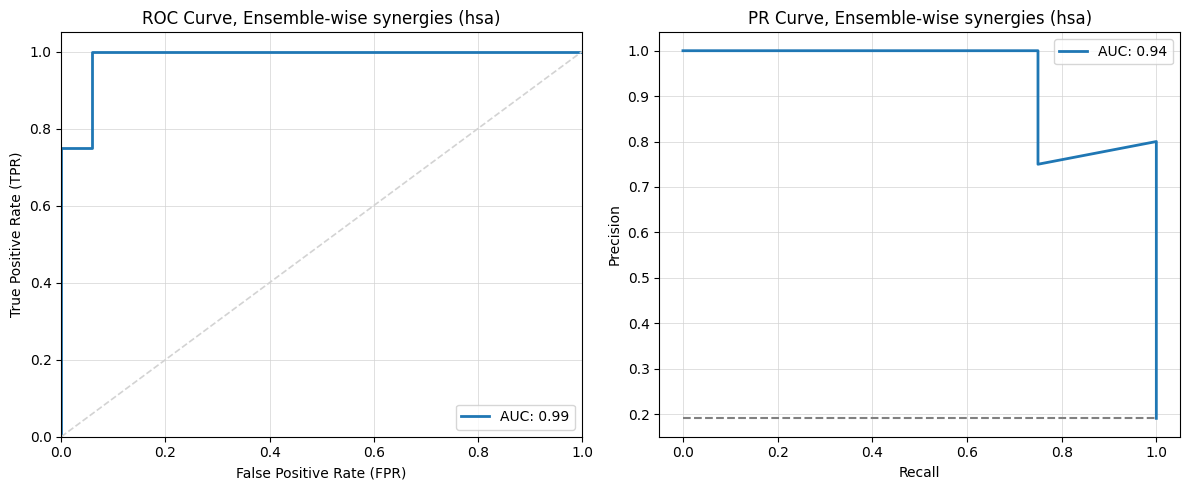

2024-11-14 10:32:13,828 - INFO - Predict completed in 14.19 seconds.
2024-11-14 10:32:13,829 - INFO - Total runtime for training and prediction: 20.52 seconds


In [38]:
execute(train_params=train_params, predict_params=predict_params)

### Run Train

In [58]:
execute(train_params=train_params)

2024-11-13 22:34:58,408 - INFO - Train started...
2024-11-13 22:35:04,725 - INFO - Training finished.
2024-11-13 22:35:04,726 - INFO - Train completed in 6.32 seconds.


### Run Predict

**Note:** If the Evolution process has not been previously executed, it is necessary to load the Boolean Models from a `.bnet` file. In this case `attractor_tool` and `attracto_type` must be provided.

In [59]:
predict_params = {
        'perturbations': perturbations,
        'model_outputs': model_outputs,
        'observed_synergy_scores': observed_synergy_scores,
        'synergy_method': 'bliss',
        'save_predictions': True,
        'save_path': './predictions',
        'model_directory': './pydruglogics/models/example_models',
        'attractor_tool': 'mpbn',
        'attractor_type':  'stable_states'
    }

2024-11-13 22:35:46,458 - INFO - Predict started...
2024-11-13 22:35:46,459 - INFO - Loading models from directory: ./pydruglogics/models/example_models
2024-11-13 22:35:46,462 - INFO - Boolean Model from .bnet file is created.
2024-11-13 22:35:46,486 - INFO - Loaded model from ./pydruglogics/models/example_models/e8_s1.bnet
2024-11-13 22:35:46,487 - INFO - Boolean Model from .bnet file is created.
2024-11-13 22:35:46,501 - INFO - Loaded model from ./pydruglogics/models/example_models/e31_s3.bnet
2024-11-13 22:35:46,503 - INFO - Boolean Model from .bnet file is created.
2024-11-13 22:35:46,515 - INFO - Loaded model from ./pydruglogics/models/example_models/e4_s3.bnet
2024-11-13 22:35:46,517 - INFO - Boolean Model from .bnet file is created.
2024-11-13 22:35:46,531 - INFO - Loaded model from ./pydruglogics/models/example_models/e18_s2.bnet
2024-11-13 22:35:46,532 - INFO - Boolean Model from .bnet file is created.
2024-11-13 22:35:46,545 - INFO - Loaded model from ./pydruglogics/models/e

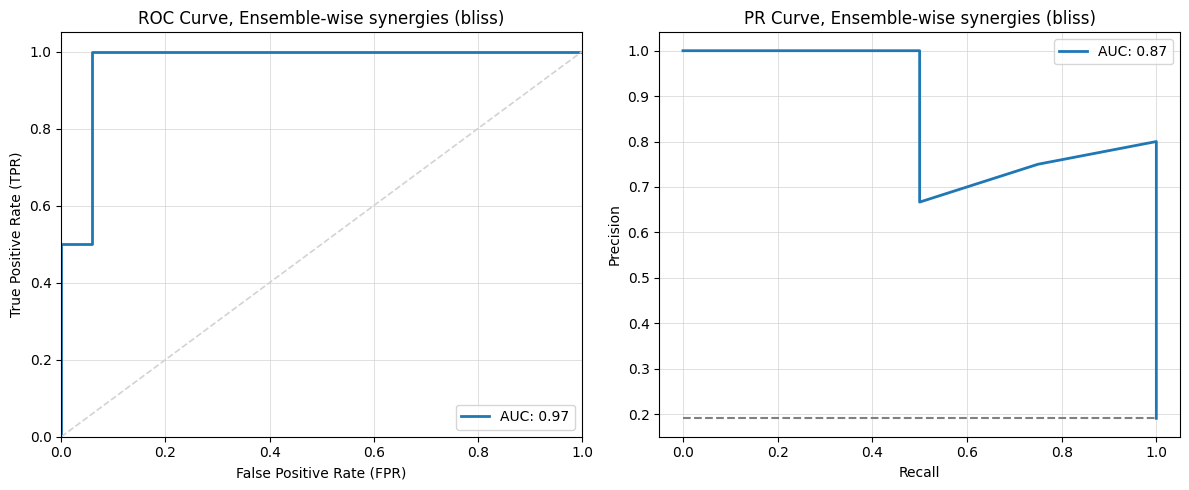

2024-11-13 22:36:03,166 - INFO - Predictions saved to ./predictions/predictions_2024_11_13_2236
2024-11-13 22:36:03,170 - INFO - Predict completed in 16.71 seconds.


In [61]:
execute(predict_params=predict_params)

## Run Statistics

#### Train Boolean Models

Boolean Models calibrated to steady state response

In [25]:
best_boolean_models_calibrated = train(boolean_model=boolean_model_bnet, model_outputs=model_outputs, training_data=training_data,
                                ga_args=ga_args, ev_args=ev_args)

2024-11-13 23:45:33,092 - INFO - Train started...
2024-11-13 23:45:39,501 - INFO - Training finished.
2024-11-13 23:45:39,502 - INFO - Train completed in 6.41 seconds.


Boolean Models match to proliferation profile.

In [26]:
best_boolean_models_random = train(boolean_model=boolean_model_bnet, model_outputs=model_outputs, ga_args=ga_args, ev_args=ev_args)

2024-11-13 23:46:07,853 - INFO - Train started...
2024-11-13 23:46:07,854 - INFO - Training data initialized from list.
2024-11-13 23:46:10,794 - INFO - Training finished.
2024-11-13 23:46:10,795 - INFO - Train completed in 2.94 seconds.


### Compare Boolean Models trained by calibrated and random data

The `compare_two_simulations` function compares the predictive performance of two sets of evolved Boolean models by plotting ROC and PR curves. 
#### Parameters:

- `boolean_models1`: A list of the best Boolean models from the first run.
- `boolean_models2`: A list of the best Boolean models from the second run.
- `observed_synergy_scores`: A reference list of observed synergy scores used to evaluate the predictive performance of the models.
- `model_outputs`: An instance of `ModelOutputs`. 
- `perturbations`: An instance of `Perturbation`.
- `synergy_method` (optional): The method for assessing synergy. Options: `'hsa'` (Highest Single Agent) or  `'bliss'` (Bliss Independence). By default, `'hsa'`.
- `label1` (optional): A custom label for the first set of evolution results shown in the plots. By default, `'Models 1'`.
- `label2` (optional): A custom label for the second set of evolution results shown in the plots. By default,`'Models 2'`.
- `normalized` (optional): Whether or not to normalize the synergy scores of the first set. By default, `True`.

In [27]:
from pydruglogics.model.Statistics import compare_two_simulations

2024-11-13 23:46:50,412 - INFO - 
Synergy scores (hsa):
2024-11-13 23:46:50,413 - INFO - PI-PD: -1.3149509803921566
2024-11-13 23:46:50,414 - INFO - PI-CT: 0
2024-11-13 23:46:50,415 - INFO - PI-BI: -0.007352941176470562
2024-11-13 23:46:50,415 - INFO - PI-PK: -0.001626016260162566
2024-11-13 23:46:50,416 - INFO - PI-AK: -0.013333333333333641
2024-11-13 23:46:50,416 - INFO - PI-5Z: -0.3088235294117645
2024-11-13 23:46:50,416 - INFO - PD-CT: 0
2024-11-13 23:46:50,417 - INFO - PD-BI: 0.013333333333333641
2024-11-13 23:46:50,417 - INFO - PD-PK: 2.2666666666666666
2024-11-13 23:46:50,419 - INFO - PD-AK: -0.5695238095238098
2024-11-13 23:46:50,419 - INFO - PD-5Z: 0
2024-11-13 23:46:50,420 - INFO - CT-BI: 0
2024-11-13 23:46:50,420 - INFO - CT-PK: 0
2024-11-13 23:46:50,421 - INFO - CT-AK: 0
2024-11-13 23:46:50,421 - INFO - CT-5Z: 0
2024-11-13 23:46:50,422 - INFO - BI-PK: -0.3268292682926829
2024-11-13 23:46:50,422 - INFO - BI-AK: 0.11333333333333329
2024-11-13 23:46:50,423 - INFO - BI-5Z: 0.16

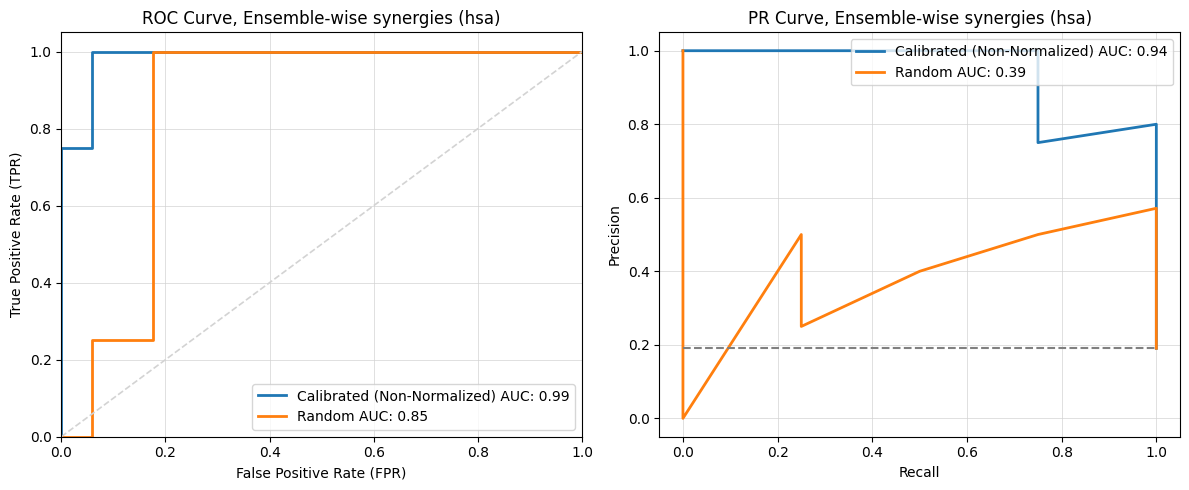

In [28]:
compare_two_simulations(best_boolean_models_calibrated, best_boolean_models_random, observed_synergy_scores,
                            model_outputs,perturbations, 'hsa','Calibrated (Non-Normalized)',
                            'Random', False)
    

### Sampling

The `sampling_with_ci` function performs sampling on a list of Boolean models, calculates confidence intervals, and plots a Precision-Recall (PR) curve to assess the predictive performance in identifying synergistic drug combinations.

#### Parameters:

- `boolean_models`: A list of `BooleanModel` instances used for the sampling.
- `observed_synergy_scores`: A list of observed synergy scores.
- `model_outputs`: An instance of `ModelOutputs`.
- `perturbations`: An instance of `Perturbation`.
- `synergy_method` (optional): The method for assessing synergy. Options: `'hsa'` (Highest Single Agent) or  `'bliss'` (Bliss Independence). By default, `'hsa'`.
- `repeat_time` (optional): The number of times to repeat the sampling process. By defualt, `10`.
- `sub_ratio` (optional): The proportion of models to sample in each iteration. By defualt, `0.8`.
- `boot_n` (optional): The number of bootstrap iterations for calculating confidence intervals. By defualt, `1000`.
- `confidence_level` (optional): The confidence level used for the interval calculations. By defualt, `0.9`.
- `plot_discrete` (optional): Whether to plot discrete points instead of continuous line on the PR curve. By defualt, `False`.
- `with_seeds` (optional): Whether to use a fixed seed for reproducibility. By defualt, `True`.
- `seeds` (optional): The seed value to ensure reproducibility. By defualt, `42`.


In [70]:
from pydruglogics.model.Statistics import sampling_with_ci

2024-11-13 22:43:40,897 - INFO - 
Synergy scores (hsa):
2024-11-13 22:43:40,897 - INFO - PI-PD: -1.2175700934579439
2024-11-13 22:43:40,898 - INFO - PI-CT: 0
2024-11-13 22:43:40,899 - INFO - PI-BI: -0.06542056074766345
2024-11-13 22:43:40,899 - INFO - PI-PK: -0.017034313725490136
2024-11-13 22:43:40,899 - INFO - PI-AK: 0
2024-11-13 22:43:40,900 - INFO - PI-5Z: -0.30841121495327073
2024-11-13 22:43:40,900 - INFO - PD-CT: 0
2024-11-13 22:43:40,901 - INFO - PD-BI: 0.02083333333333348
2024-11-13 22:43:40,901 - INFO - PD-PK: 2.3058823529411763
2024-11-13 22:43:40,901 - INFO - PD-AK: -0.575
2024-11-13 22:43:40,902 - INFO - PD-5Z: 0
2024-11-13 22:43:40,902 - INFO - CT-BI: 0
2024-11-13 22:43:40,902 - INFO - CT-PK: 0
2024-11-13 22:43:40,902 - INFO - CT-AK: 0
2024-11-13 22:43:40,902 - INFO - CT-5Z: 0
2024-11-13 22:43:40,902 - INFO - BI-PK: -0.3191176470588235
2024-11-13 22:43:40,903 - INFO - BI-AK: 0.05833333333333357
2024-11-13 22:43:40,903 - INFO - BI-5Z: 0.1708333333333334
2024-11-13 22:43:40

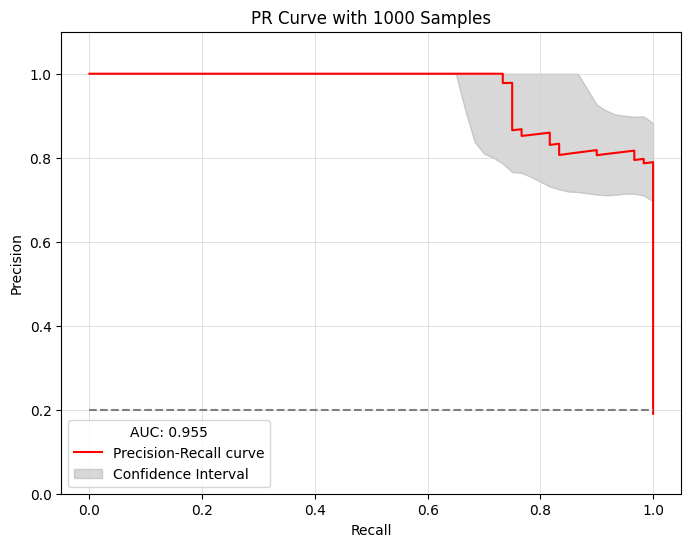

In [72]:
sampling_with_ci(best_boolean_models_calibrated, observed_synergy_scores, model_outputs, perturbations,
                     repeat_time=15, sub_ratio=0.8, boot_n=1000, confidence_level= 0.95, plot_discrete=False, with_seeds=True)